# Ham and Spam message classification using machine learning

In [1]:
# IMPORT LIBRARY
import numpy as np
import pandas as pd
import nltk
import re
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the dataset using the url
dataset_url = "https://raw.githubusercontent.com/bigmlcom/python/master/data/spam.csv"
dataset = pd.read_csv(dataset_url, sep='\t')
dataset.head(3)

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


# Data Visualization

In [3]:
# check the dataset shape
dataset.shape

(656, 2)

In [4]:
# Check if there is a missing value in the dataset
dataset.isnull().sum()

Type       0
Message    0
dtype: int64

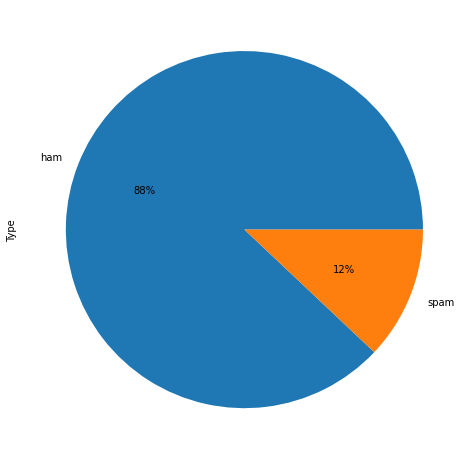

In [5]:
# Display the proportion of the ham and spam data 
plt.rcParams["figure.figsize"] = [8,10] 
dataset.Type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.show()

- Create a list that contains a number of the words in ham messages and their count of occurence in  the dataset.

In [6]:
# Ham Dataset 
dataset_ham = dataset[dataset['Type']=='ham']
dataset_ham_count = dataset_ham['Message'].str.split().str.len()
dataset_ham_count.index = dataset_ham_count.index.astype(str) + ' words:'
dataset_ham_count.sort_index(inplace=True)

- Create a list that contains a number of the words in spam messages and their count of occurence in  the dataset.

In [7]:
# Spam Dataset
dataset_spam = dataset[dataset['Type'] == "spam"]
dataset_spam_count = dataset_spam['Message'].str.split().str.len()
dataset_spam_count.index = dataset_spam_count.index.astype(str) + ' words:'
dataset_spam_count.sort_index(inplace=True)

- Plots the histogram using the spam and ham message list that you just created.

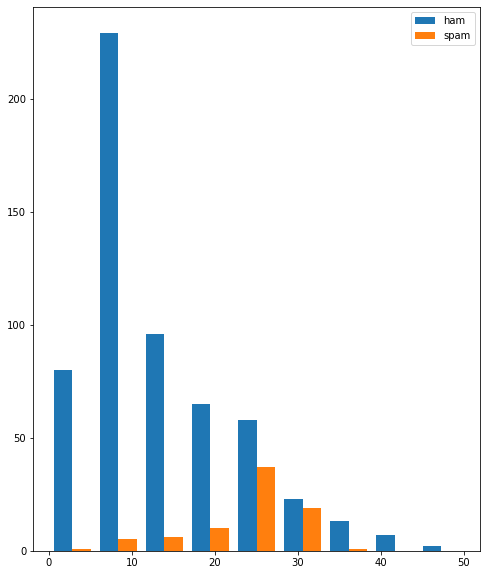

In [8]:
bins = np.linspace(0, 50, 10)
plt.hist([dataset_ham_count, dataset_spam_count], bins, label=['ham', 'spam'])
plt.legend(loc='upper right')
plt.show()

# Data Preprocessing

In [9]:
# The function that removes everything except alphabet
def text_preprocess(sen):
    sen = re.sub('[^a-zA-Z]','',sen)
    sen = re.sub(r"\s+[a-zA-Z]\s+",'',sen)
    sen = re.sub(r'\s+','', sen)
    return sen

Divide the data into features and labels i.e messages and their types

In [10]:
X = dataset['Message']
y = dataset['Type']

Clean all the messages, execute a foreach loop that passes each message one by one to the text_process() function which clean the text.

In [11]:
X_messages =[]
messages = list(X)
for mes in messages:
    X_messages.append(text_preprocess(mes))

In [12]:
X_messages

['GountiljurongpointcrazyAvailableonlyinbugisngreatworldlaebuffetCinetheregotamorewat',
 'OklarJokingwifuoni',
 'FreeentryinawklycomptowinFACupfinaltktsstMayTextFAtotoreceiveentryquestionstdtxtrateTCsapplyovers',
 'UdunsaysoearlyhorUcalreadythensay',
 'NahIdontthinkhegoestousfhelivesaroundherethough',
 'FreeMsgHeytheredarlingitsbeenweeksnowandnowordbackIdlikesomefunyouupforitstillTbokXxXstdchgstosendtorcv',
 'EvenmybrotherisnotliketospeakwithmeTheytreatmelikeaidspatent',
 'AsperyourrequestMelleMelleOruMinnaminunginteNurunguVettamhasbeensetasyourcallertuneforallCallersPresstocopyyourfriendsCallertune',
 'WINNERAsavaluednetworkcustomeryouhavebeenselectedtoreceiveaprizerewardToclaimcallClaimcodeKLValidhoursonly',
 'HadyourmobilemonthsormoreURentitledtoUpdatetothelatestcolourmobileswithcameraforFreeCallTheMobileUpdateCoFREEon',
 'ImgonnabehomesoonandidontwanttotalkaboutthisstuffanymoretonightkIvecriedenoughtoday',
 'SIXchancestowinCASHFromtopoundstxtCSHandsendtoCostpdaydaysTsandCsapplyRepl

# Converting text to numbers

In [13]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vec = TfidfVectorizer (max_features=2500, stop_words=stopwords.words('english')) 
X= tfidf_vec.fit_transform(X_messages).toarray()

We specify that the 2500 most ooccuring words shoul be included in the ffeature set where a word should occur in a minimum of 7 messages and maximum of 880% of the messages. words that occur a very few times or in a large number of docuements are not very good for classification. hence  they are removed.

# Divide or split the dataset

In [14]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply ML model

In [15]:
# RANDOM FOREST CLASSSIER
from sklearn.ensemble import RandomForestClassifier 
rf_clf = RandomForestClassifier(n_estimators=250, random_state=0) 
rf_clf.fit(X_train, y_train) 
y_pred = rf_clf.predict(X_test)

In [16]:
print(accuracy_score(y_test,y_pred))

0.8719512195121951


In [18]:
print(accuracy_score(y_test,y_pred))

0.13414634146341464


In [19]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(X_train,y_train)
y_pred= model.predict(X_test) 

In [20]:
print(accuracy_score(y_test,y_pred))

0.8719512195121951


In [21]:
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)
predicted= model.predict(X_test) 

In [23]:
print(accuracy_score(y_test,predicted))

0.8719512195121951
